# EDA on Food Dataset

In [1]:
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
import sys

## Load Data

From the data loading and save notebook I specified a file path for the pickled dataset. Here I can easily reload in much quicker to do EDA and later on I can use the same process for modelling.

In [2]:
saved_path = "/Users/harrymckinney/Desktop/SavedArrays/FinalSet.npz"

In [3]:
loaded_data = np.load(saved_path, allow_pickle=True)

In [4]:
food_ims = dict()

for key in loaded_data.keys():
    
        food_ims[key] = loaded_data[key]
        print(f"Successfully loaded {key} into dictionary")

Successfully loaded Apple into dictionary
Successfully loaded Egg into dictionary
Successfully loaded Onion into dictionary
Successfully loaded Cucumber into dictionary
Successfully loaded Cheese into dictionary
Successfully loaded Watermelon into dictionary
Successfully loaded Pasta into dictionary
Successfully loaded Bread into dictionary
Successfully loaded Banana into dictionary
Successfully loaded Pepper into dictionary
Successfully loaded Tomato into dictionary
Successfully loaded Orange into dictionary
Successfully loaded Carrot into dictionary
Successfully loaded Beans into dictionary
Successfully loaded Grapes into dictionary
Successfully loaded Kiwi into dictionary


## Check Class Distributions for Data Imbalances

I am going to just print out how many images are in each folder and the name of the folder.

In [5]:
total_arrs = 0
total_folders = 0

for key in food_ims.keys():
    print(f"There are {len(food_ims[key])} arrays for the {key} folder")
    total_arrs += len(food_ims[key])
    total_folders += 1

print(f"\nThere are {total_arrs} total arrays.")
print(f"\nThere are {total_folders} folders in total.")

There are 435 arrays for the Apple folder
There are 267 arrays for the Egg folder
There are 328 arrays for the Onion folder
There are 120 arrays for the Cucumber folder
There are 259 arrays for the Cheese folder
There are 75 arrays for the Watermelon folder
There are 207 arrays for the Pasta folder
There are 268 arrays for the Bread folder
There are 119 arrays for the Banana folder
There are 94 arrays for the Pepper folder
There are 370 arrays for the Tomato folder
There are 235 arrays for the Orange folder
There are 96 arrays for the Carrot folder
There are 279 arrays for the Beans folder
There are 68 arrays for the Grapes folder
There are 61 arrays for the Kiwi folder

There are 3281 total arrays.

There are 16 folders in total.


Using this information, I can get a sense of the distribution of data amongst the classes. I want a visual to represent this information.

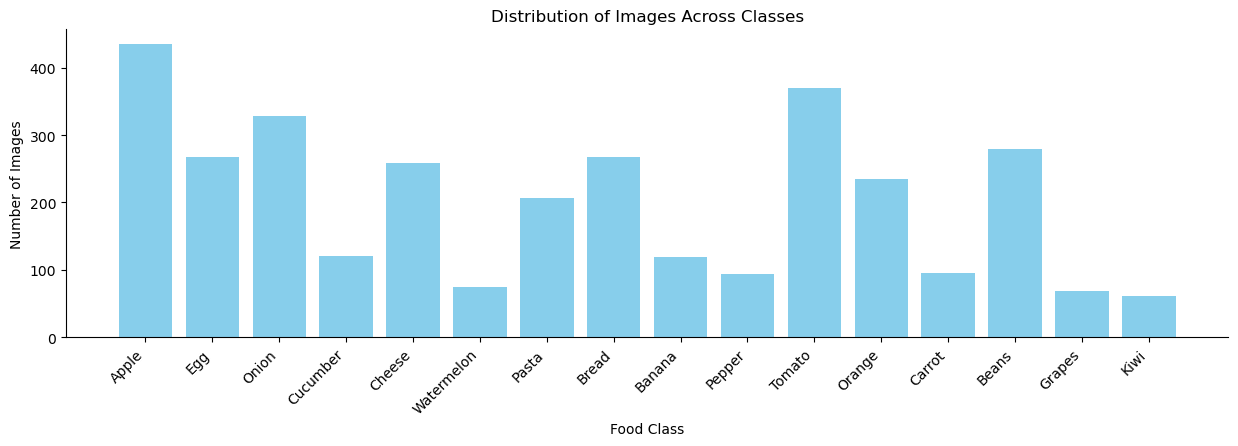

In [6]:
plt.figure(figsize=(15, 4))

food_class_counts = [len(food_ims[key]) for key in food_ims.keys()]

# Create a histogram
plt.bar(food_ims.keys(), food_class_counts, color='skyblue')
plt.xlabel('Food Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')
plt.xticks(rotation=45, ha='right')  

sns.despine()
plt.show()

## Plotting Pixel Value Intensities as a Histogram

In this function I take a random image array and plot the distribution of pixel intensities in the image. The intensities can take on a range between 0 and 255. 

In [9]:
def plot_histogram(img_array,title):
    
    '''
    inputs: img_array: an image array for plotting
            title: a string for the title of the plot
            
    outputs: no return, it will plot the histogram
    '''
    
    plt.figure(figsize=(12, 4))
    
    pixel_intensity = np.arange(256)

    color = ['RED', 'GREEN', 'BLUE']
    
    for i, color in enumerate(color):
        channel_hist = Image.fromarray(img_array[:, :, i]).histogram()
        
        plt.hist(pixel_intensity, bins=pixel_intensity+1, weights=channel_hist, color=color, alpha=0.5, label=f'{color} channel')

    plt.title(f'{title}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    sns.despine()
    plt.show()

We can take a look at the count of pixel intensities in a random image of a Banana. This plot is essentially an unordered representation of pixel values in the image. 

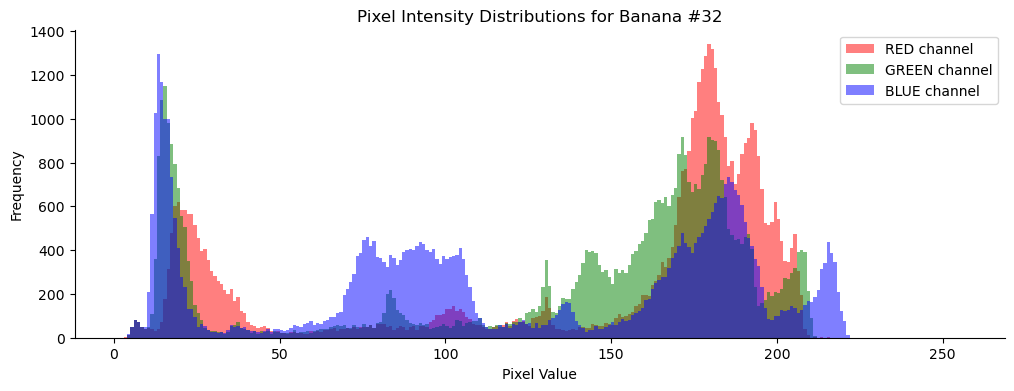

In [10]:
plot_histogram(food_ims["Banana"][32], "Pixel Intensity Distributions for Banana #32")

## Averaging Pixel Values of an Entire Class to Generate Image 

Here I want to create a function that computes an array which represents the average pixel values for an entire class. This will be useful in trying to understand where a model might confuse certain classes.

In [11]:
def get_average_image(image_list):
    
    # Convert the list of images to a single NumPy array
    image_arrays = np.array(image_list)
    
    # Calculate the mean
    average_image = np.mean(image_arrays, axis=0)
    
    # Ensure values are within [0, 255] and convert to uint8
    average_image = np.clip(average_image, 0, 255).astype(np.uint8)
    
    return average_image

I can show each image to get a visual representation of the variance in the image data. We don't want a clear image as this would indicate that the dataset is not diverse and the model likely wouldn't learn anything from training or it would easily overfit.

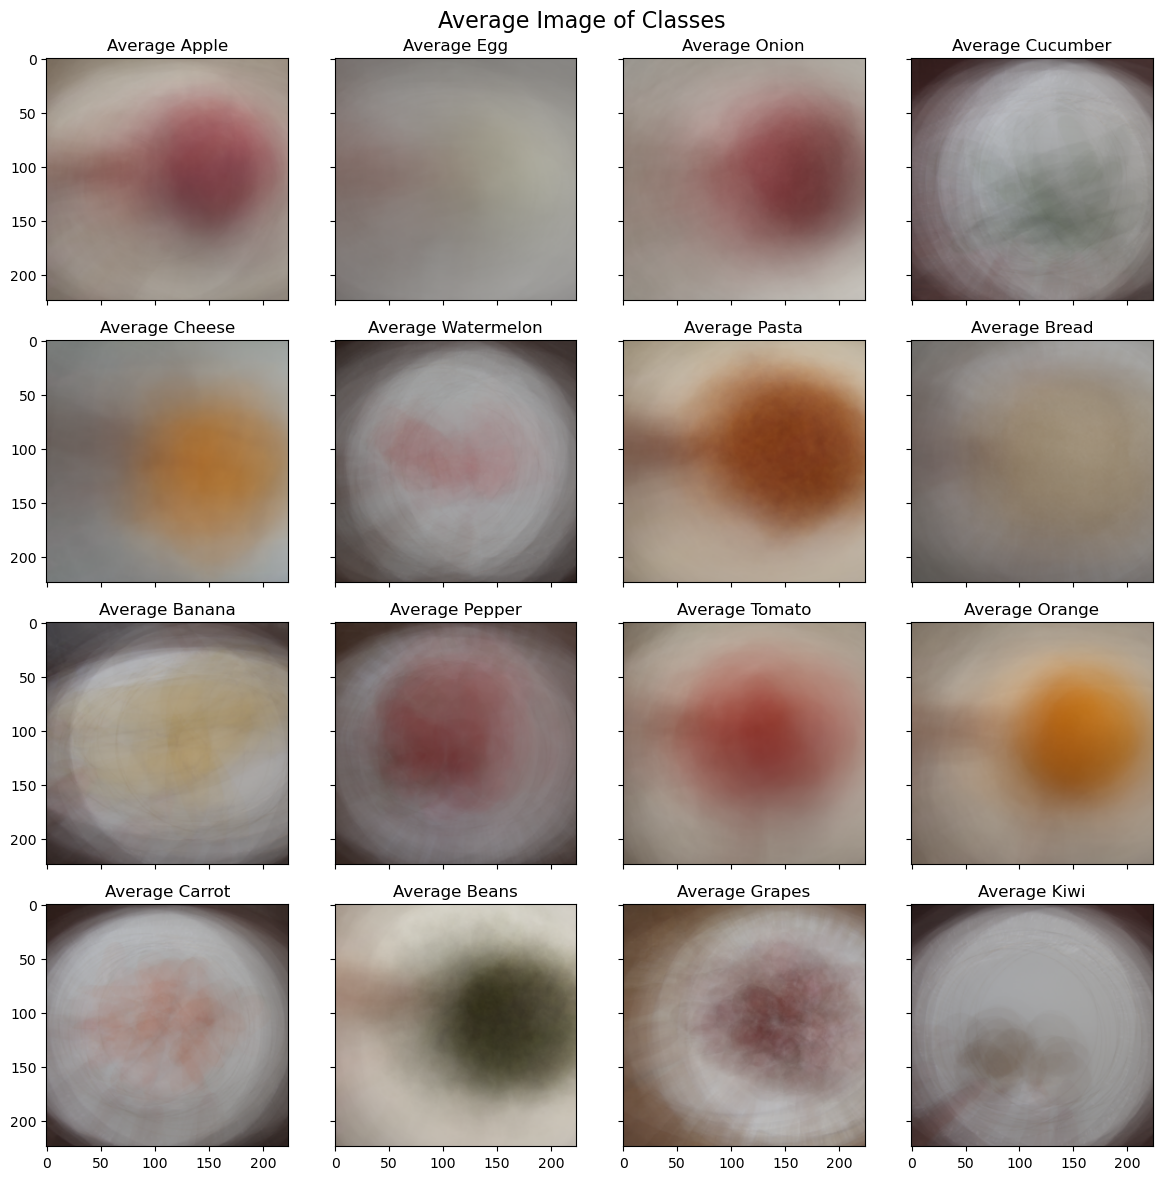

In [12]:
plt.subplots(4, 4, figsize=(12, 12), sharex='col', sharey='row')
plt.suptitle('Average Image of Classes', fontsize=16)

for i, food in enumerate(food_ims.keys(), 1):
    
    plt.subplot(4, 4, i)
    
    average_image = get_average_image(food_ims[food])

    plt.imshow(average_image)
    plt.title(f"Average {food}") 
    
plt.tight_layout()
plt.show()

## Pixel Intensity Histogram of Average Image Class

I can combine these two functions to look at the pixel intensity distributions for the average image of a class.

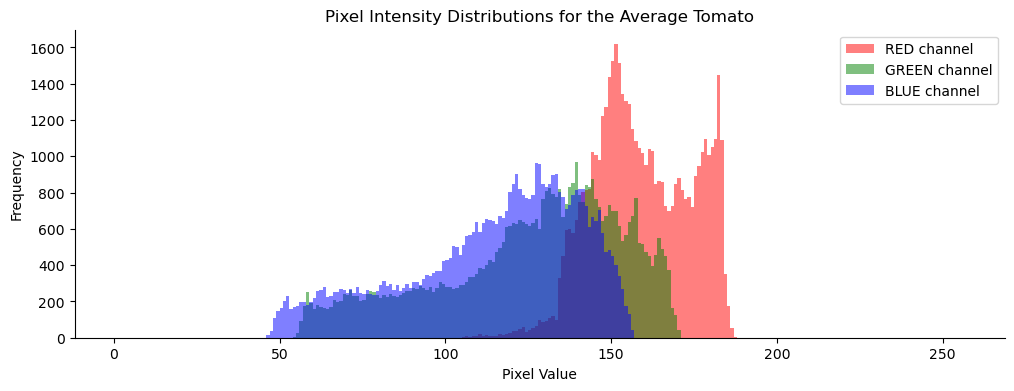

In [13]:
check = "Tomato"
plot_histogram(get_average_image(food_ims[check]), f"Pixel Intensity Distributions for the Average {check}")

Finally, I can look at the pixel intensity distributions for the average image of every class and compare them.

## Pixel Intensity Histograms of All Average Image Classes

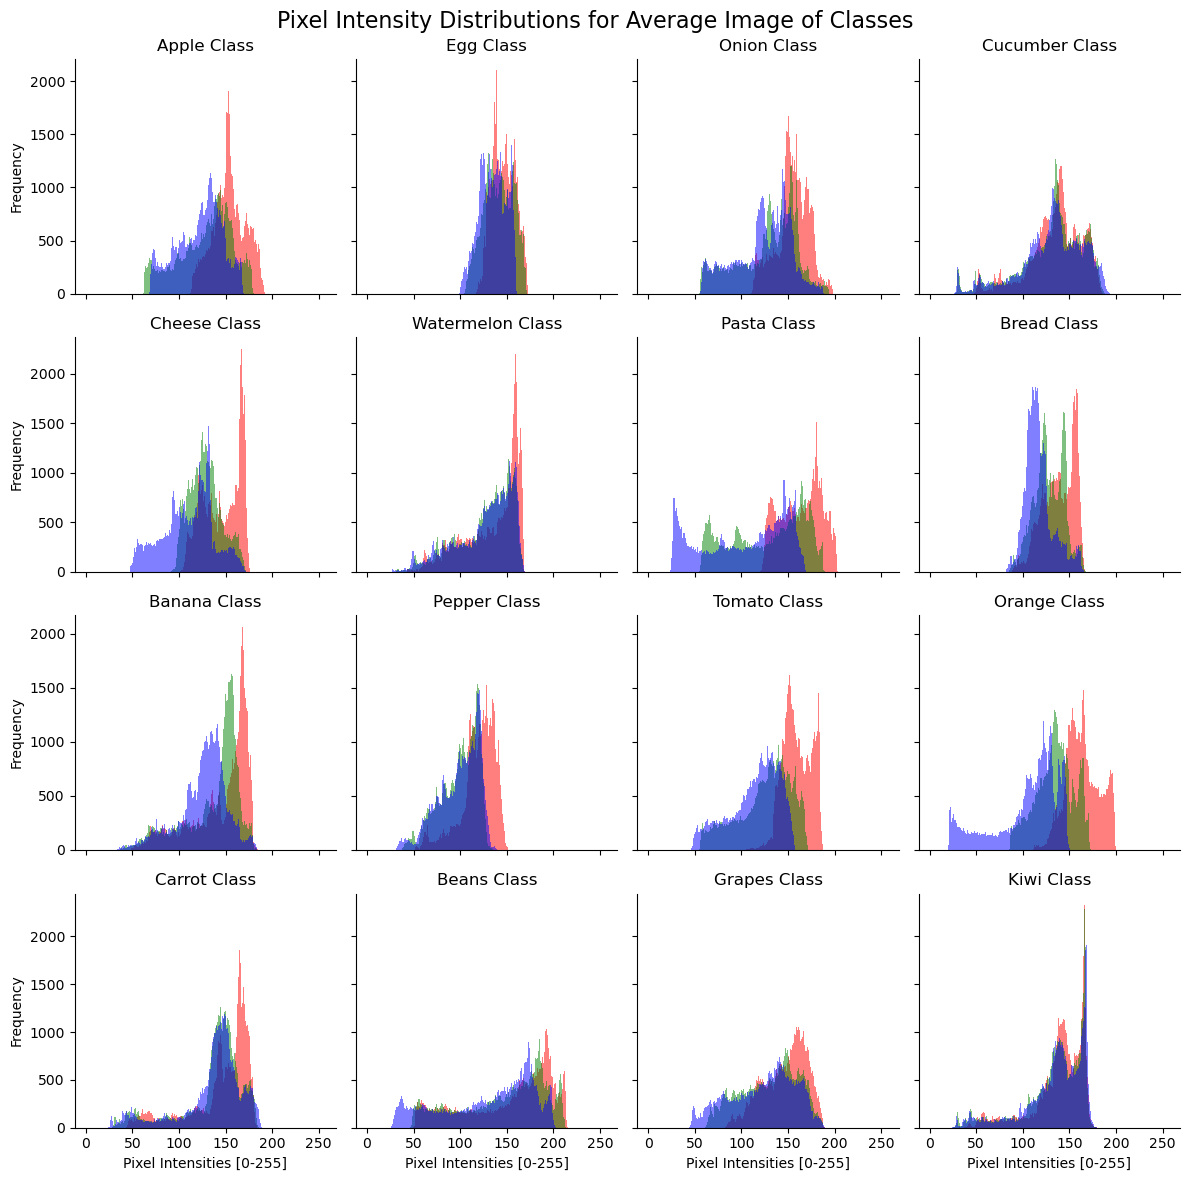

In [14]:
# Loop over the columns and plot the relationship between each column and the target
plt.subplots(4, 4, figsize=(12, 12), sharex='col', sharey='row')
plt.suptitle('Pixel Intensity Distributions for Average Image of Classes', fontsize=16)

for i, (food, img_data) in enumerate(food_ims.items(), 1):
    
    img_array = get_average_image(food_ims[food])
    pixel_intensity = np.arange(256)
    color = ['RED', 'GREEN', 'BLUE']
    
    plt.subplot(4, 4, i)
    
    for channel, color in enumerate(color):
        
        # Calculate the histogram using the Image.histogram method
        channel_hist = Image.fromarray(img_array[:, :, channel]).histogram()
        # Plot the histogram for each color
        plt.hist(pixel_intensity, bins=pixel_intensity+1, weights=channel_hist, color=color, alpha=0.5, label=f'{color} channel')
        plt.title(f'{food} Class')
        sns.despine()
        
        # Add contional labels for my subplot format
        if i in range(1,14,4):
            plt.ylabel("Frequency")
        if i in range(13,17):
            plt.xlabel("Pixel Intensities [0-255]")
        
    
plt.tight_layout()
plt.show()